# Introduction to Fundamentals of Data Science - STAT 411

We start with some examples of the kinds of problems we will consider in this class. I am calling these motivating problems because we will return to them again and again as class goes on.

Please read the syllabus. We will not take time to go over it entirely here. You should have an email from me with:
1. The syllabus as an HTML file,
2. A link to the Google Drive for class, and 
3. A link inviting you to joing the Slack channel for our class.

I will not go through the whole syllabus today. Before we get started with the statistics, some preliminaries:

## Anaconda, Jupyter, and Python

We will be using Jupyter and Python for class. Python is a programing language, Jupyter is a shell for intereacting with it and creating nice files, and Anaconda is a distribution that will install both systems for you and manage most of the packages we need.

Some details:
- [You will need to download and install Anaconda from this website](https://www.anaconda.com/)
- You will then need to go into the package manager under *Environments* and install pandas, seaborn, and scikitlearn. If your Jupyter is updated during class you will need to install these pakcages again.

## Github

[All of the course materials, including the syllabus, will be in the Github repository for our class, available here](https://github.com/virgilpierce/STAT_411). This is a public repository. There are three ways to use it to get the course files. You can download individual files and folders from it, or you can create a Github account and clone it yourself, and finally you could create a Github account and make a pull request for it. 

Later in class we will cover how to use Github with your team for versioning control.

I will accept, and be grateful for, commit requests from you to fix typos in the course files, or you can add them to the "issues" tab in Github. 

## Python

The course will use a lot of Python, however I am not assuming you already know it. We will have example files to start from, and it is generally a speaking an easy yet powerful language to learn.

### Why Python

There is a fair amount of debate about whether Data Science should be taught with Python, R, or some other language. Here is why I am using Python and asking you to use it, however as I say this is not a settled question.

- Python is realitvely easy to learn. It is a language for which readability counts,
- Python is highly used in Mathematics, Statistics and Science. It is generally more broadly applicable than R,
- It is widely used in industry for Data Science and other computations,
- It is my assertion that if you learn Data Science with Python, you will easily be able to pick up R if you find yourself in a shop that uses it,
- And finally the bulk of my experience with Data Science has been through Python.



## Some Prelimaries

In [1]:
# We will typically need four modules

import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library

In [2]:
# If you are new to Python these commands are loading external module files that 
# contains list of commands we need. The commands are accessed by the <name of module>.<name of command>
# For example

np.sqrt(9)

# Pulls the sqrt() function from the numpy package. I am using the alias np for numpy (from the 'as np')
# to save myself three letters each time I use a numpy command. 

3.0

Note what happened here:

- The "#" characters represent comment lines - they are not read by the interpreter,
- In Jupyter the last executed line of a cell is cycled through the print() function and displayed as nice output.

### Getting Help

First there is inline help from two functions:

In [10]:
# Adding a question mark after a command gives us an overview of that command

list?

Init signature: list(iterable=(), /)
Docstring:     
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
Type:           type
Subclasses:     _HashedSeq, StackSummary, SList, _ImmutableLineList, FormattedText, NodeList, _ExplodedList, Stack, _Accumulator, _ymd, ...


In [11]:
# the dir() function lists attributes a function has:
# However many of the attributes are so-called system attributes and not very helpful. 
# I typically ask Python to drop them using a simple list comprehension.

[x for x in dir(list) if not '__' in x]

# You can read this command in English: [] - make a list; of elements x for each x in 
# dir(list) if x does not contain the string '__'

['append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

What we get is a list of commands that can apply to a list in Python.

Then there is google help. Particularly if you are using one of the packages like seaborn, there is extensive online documentation about how it works. Just look. Most problems can be resolved in a few minutes.

I have reference books, but my warning to you is not to spend to much money on them. The online help has more detail, and in my experience the books will never have the right details - you end up using the inline and online help more.

## First Motivating Example

Before we get to far, lets look at an example to see what we are aiming at in this class. Consider the dataset of Major League Baseball Players height and weight.

In [23]:
# Read in the major league players data set

major = pa.read_csv('Data Sets/Major League Height-Weight.csv')   # creates a pandas Dataframe from a .csv file

# Each row of a data frame is a data point - in this case a player.
# Each column is a feature about the data point (its coordinates if you will)

major.head()   # displays the first few rows

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [24]:
# Rename the Height and Weight columns so it is easier to refer to them.

major = major.rename({'Height(inches)':'Height', 'Weight(pounds)':'Weight'}, axis=1)  

# This using a dictionary {'old name':'new name' } to change the names
# axis = 1 tells it we are changing columns
# axis = 0 would tell it we were changing rows

major.tail()

,Name,Team,Position,Height,Weight,Age
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01
1033,Josh_Kinney,STL,Relief_Pitcher,73,195.0,27.92


**First Way Data Science is not Statistics:** We will use ONLY real data in this class. Real data is messy. 

Our first data set is missing a value for one of the players:

In [41]:
major[pa.isna(major_2.Weight)]    # pa.isna(major_2.Weight) gives a list of True or False values, True is 
                                    # for a player (row) that is missing a value for the Weight feature (column)

,Name,Team,Position,Height,Weight,Age
640,Kirk_Saarloos,CIN,Starting_Pitcher,72,NaN,27.77


For now it is probably simplest to just not use this player in our analysis. But generally we should ask: What should we do with missing data?

In [42]:
major = major.drop(640, axis=0)    # Remove row 640 (note axis = 0)

In [44]:
# Check the size of our dataframe

major.shape  # Our dataframe has 1033 players (rows) and 6 features (columns)

# We will **OFTEN** be thinking about the dataframe as a matrix, hence the rows x columns language.

(1033, 6)

### First Question

What are the relationships between the numeric features of the players?

We start by just consider the histograms and scatter plots for the numerical features.

We will use the seaborn package usually for plots. [I have found the online help available here to be very helpful](https://seaborn.pydata.org/).

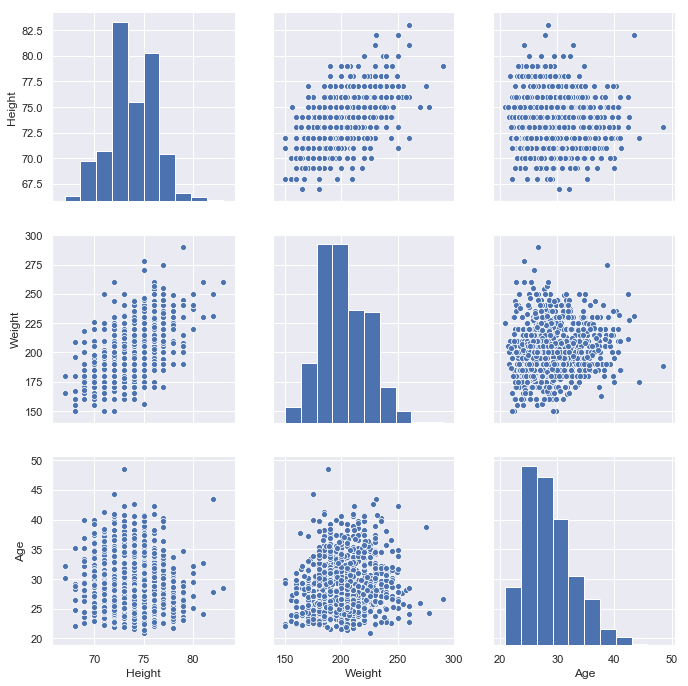

In [45]:
# Make a plot of the dataset by pairs for the numerical data

sn.set(style = 'darkgrid')   # seaborn makes nice looking plots - check the galleries for the various options

p = sn.pairplot(major)   

# Note that seaborn.pairplot will ignore categorical data (like position) unless we pass it an option.


p.fig.set_size_inches(10, 10)  

# My one major frustration with seaborn is that changing the size of a plot or figure depends
# on what plotting command you happen to be using. There is no one way to do it. However the
# plots it makes are generally so nice, that I just deal with it.

# In any case, depending on the size of the monitor you are viewing this on, you may need to adjust
# the (10, 10) above to something else.

In the figures above:
- on the diagonal: each player is a box in one of the bars.
- on the off diagonals: each player is one of the dots.

There is a lot to notice here, and we will be coming back to this dataset again and again.

I want to point out two things right away. None of the histograms for the three features are close to a *Normal Distribution*. **Why do we say this?**

### Second Question

We might ask, how does a player's height or weight depend on the position they play?

In [46]:
set(major.Position)   # Make a set of all of the positions (eliminates duplicates)

{'Catcher',
 'Designated_Hitter',
 'First_Baseman',
 'Outfielder',
 'Relief_Pitcher',
 'Second_Baseman',
 'Shortstop',
 'Starting_Pitcher',
 'Third_Baseman'}

In [63]:
# We are going to make a dictionary of key:value pairs to recode the Position feature to 
# 'Pitcher' and 'Not Pitcher'

pos_dict = {}  # Make an empy dictionary
for x in list(set(major.Position)):  # Sets are not iterable objects, so we convert the positions to a list
    if 'Pitcher' in x:    # If the position is one of the types of Pitchers
        pos_dict.update({x:'Pitcher'}) # add the x:'Pitcher' key:value pair to our dictionary
    else:
        pos_dict.update({x:'Not Pitcher'})  # otherwise add the x:'Not Pitcher' pair.
        
major_2 = major.copy()   # pandas.dataframe is a mutable object so we use the .copy() command 
                         # otherwise changes to major_2 will change major
    
major_2.Position = major_2.Position.map(pos_dict)  # muse the dictionary we made to recode the values

major_2 # print the dataframe to check if there is a problem

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Not Pitcher,74,180.0,22.99
1,Paul_Bako,BAL,Not Pitcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Not Pitcher,72,210.0,30.78
3,Kevin_Millar,BAL,Not Pitcher,72,210.0,35.43
4,Chris_Gomez,BAL,Not Pitcher,73,188.0,35.71
5,Brian_Roberts,BAL,Not Pitcher,69,176.0,29.39
6,Miguel_Tejada,BAL,Not Pitcher,69,209.0,30.77
7,Melvin_Mora,BAL,Not Pitcher,71,200.0,35.07
8,Aubrey_Huff,BAL,Not Pitcher,76,231.0,30.19
9,Adam_Stern,BAL,Not Pitcher,71,180.0,27.05


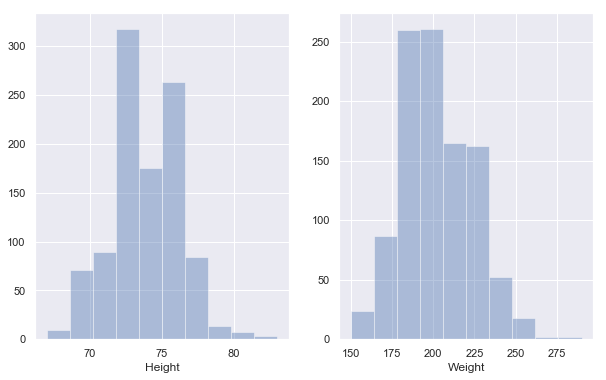

In [64]:
# Make a histogram of the heights and weights

sn.set(style = 'darkgrid')  # Set the style

f, ax = plt.subplots(1, 2, sharey=False, figsize = (10, 6))   # Make a 1 x 2 grid for multiple plots
sn.distplot(major_2.Height, ax=ax[0], kde=False, bins=10)  
sn.distplot(major_2.Weight, ax=ax[1], kde=False, bins=10);

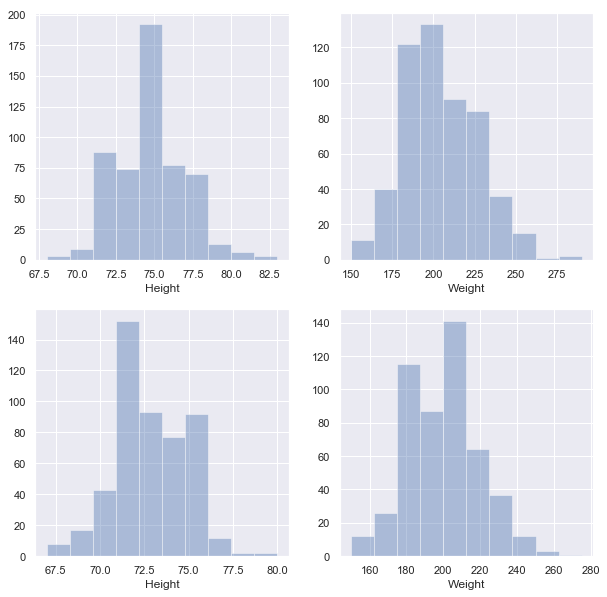

In [65]:
# Make them again but by position also

sn.set(style = 'darkgrid') 

f, ax = plt.subplots(2, 2, sharey=False, figsize = (10, 10))   # Make a 2 x 2 grid for multiple plots
sn.distplot(major_2[major_2.Position=='Pitcher'].Height, ax=ax[0, 0], kde=False, bins=10)  
sn.distplot(major_2[major_2.Position=='Pitcher'].Weight, ax=ax[0, 1], kde=False, bins=10)
sn.distplot(major_2[major_2.Position!='Pitcher'].Height, ax=ax[1, 0], kde=False, bins=10)
sn.distplot(major_2[major_2.Position!='Pitcher'].Weight, ax=ax[1,1], kde=False, bins=10);

In [68]:
print('Pitchers Mean Height: {}'.format(major_2[major_2.Position == 'Pitcher'].Height.mean()))
print('Non-Pitchers Mean Height: {}'.format(major_2[major_2.Position != 'Pitcher'].Height.mean()))

Pitchers Mean Height: 74.5214953271028
Non-Pitchers Mean Height: 72.81526104417671


### What is Data Science

or 

### Why Data Science

If this was a traditional Statistics class (like STAT 150), at this point we might do a hypothesis test to test whether Pitchers are taller. However there are two problems with the traditional approach (neither of which is a deal breaker in this example):

1. Hypothesis testing requires us to know (or assume) the distribution of players' heights. 
2. Hypothesis testing requires us to use the data to estimate the parameters of the distribution of players' heights.

These are not theoretical concerns:  Note there are some classic examples of samples taken from different distributions that have the same means and standard deviations. 

These problems become worse the larger the dimension we work with - the more features we include. This is called the curse of dimensionality:  Suppose we had n data points estimating a distribution in one dimension. The amount of data we need in order to be as certain of our estimates of a distribution for dimension d, is proportional to $n^d$.

### A World of Data and a World of Computation

Two things have been happening over the last decades that promise to rescue us from the curse of dimensionality and simmultaneously free us from having to assume the distrubtion in statistical questions. 

- Data has become **VERY** cheap

High dimensional data (data with lots of features) is now (sometimes) really easy and cheap to collect, and to collect in ways that computers can use (even on the fly).

- Computational power has become **VERY** cheap

You can rent time on Google Cloud or the Amazon Web Servers for small fractions of a penny per minute. Your company can do it on-demand.

### Results are What Matters

In this class we will build models for *Regression* (estimating values of a numerical parameter) and for *Categorization* (estimating values for a categorical parameter) from high dimensional data (data with many features). We will use a process for doing this that will produce a model and an estimate on the error of our model.

This will be possible without having to worry about the underlying distributions and parameters.

In some cases we will do it without even worrying or understanding why the model works.